In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers[torch]
!pip install datasets
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# 데이터 불러오기

In [3]:
DF = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF['product'] = DF['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF= DF[['consumer complaint narrative','product','issue']]
DF

,consumer complaint narrative,product,issue
0,I made a purchase with XXXX to purchase a prod...,Credit card,Problem with a purchase shown on your statement
1,i asked the JC Penny store employee if there w...,Credit card,Getting a credit card
2,"Synchrony Bank, who owns the stores credit car...",Credit card,Closing your account
3,This bank doesnt value me as a customer or my ...,Credit card,"Other features, terms, or problems"
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,Problem with a purchase shown on your statement
...,...,...,...
1326536,XX/XX/2022 Truist checking account fraudulentl...,Checking or savings account,Opening an account
1326537,We had 3 savings/investment account that were ...,Checking or savings account,Managing an account
1326538,Please refer all my complaints about Keybank. ...,Checking or savings account,Closing an account
1326539,There is a company name XXXX which provides t...,Checking or savings account,Problem with a lender or other company chargin...


In [4]:
DF = DF[DF['product'] == 'Vehicle loan or lease']
DF

,consumer complaint narrative,product,issue
103456,RE : Regional Acceptance Account Number : XXXX...,Vehicle loan or lease,Managing the loan or lease
103457,I took out a loan for a bank to purchase a veh...,Vehicle loan or lease,Struggling to pay your loan
103458,I purchased an XXXX back in XXXX that was bra...,Vehicle loan or lease,Managing the loan or lease
103459,I returned my XXXX to XXXX XXXX and now I am s...,Vehicle loan or lease,Problems at the end of the loan or lease
103460,Westlake Financial took duplicate loan payment...,Vehicle loan or lease,Managing the loan or lease
...,...,...,...
120938,I have a Power Purchase Agreement with Tesla t...,Vehicle loan or lease,Problems at the end of the loan or lease
120939,"Starting in XX/XX/XXXX, representatives from T...",Vehicle loan or lease,Problems at the end of the loan or lease
120940,"Good afternoon, I am writing to file a complai...",Vehicle loan or lease,Managing the loan or lease
120941,This Company Has Put on my credit debt collect...,Vehicle loan or lease,Managing the loan or lease


# 자연어처리

In [5]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data = list(DF['consumer complaint narrative'])
clean = []
for narrative in (data):
 clean_narrative = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》XXXX{}]', '', narrative)
 clean.append(clean_narrative)
DF['narrative'] = clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
lower = [text.lower() for text in DF['narrative'].values]
DF['narrative'] = lower

In [7]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

DF["narrative"]=DF["narrative"].apply(lambda x: remove_stopwords(x))

DF.head()

,consumer complaint narrative,product,issue,narrative
103456,RE : Regional Acceptance Account Number : XXXX...,Vehicle loan or lease,Managing the loan or lease,regional acceptance account number federally p...
103457,I took out a loan for a bank to purchase a veh...,Vehicle loan or lease,Struggling to pay your loan,took loan bank purchase vehicle 900000 advised...
103458,I purchased an XXXX back in XXXX that was bra...,Vehicle loan or lease,Managing the loan or lease,purchased back brand new loan onemain financia...
103459,I returned my XXXX to XXXX XXXX and now I am s...,Vehicle loan or lease,Problems at the end of the loan or lease,returned seeing balance idea balance paid leas...
103460,Westlake Financial took duplicate loan payment...,Vehicle loan or lease,Managing the loan or lease,westlake financial took duplicate loan payment...


# 데이터 추출 및 컬럼명 변경

In [8]:
DF_test = DF[['narrative','issue']]
DF_test.columns = ['text', 'label']
DF_test

,text,label
103456,regional acceptance account number federally p...,Managing the loan or lease
103457,took loan bank purchase vehicle 900000 advised...,Struggling to pay your loan
103458,purchased back brand new loan onemain financia...,Managing the loan or lease
103459,returned seeing balance idea balance paid leas...,Problems at the end of the loan or lease
103460,westlake financial took duplicate loan payment...,Managing the loan or lease
...,...,...
120938,power purchase agreement tesla gives option pu...,Problems at the end of the loan or lease
120939,starting representatives tesla called regardin...,Problems at the end of the loan or lease
120940,good afternoon writing file complaint request ...,Managing the loan or lease
120941,company put credit debt collector threatening ...,Managing the loan or lease


# 데이터 분할

In [9]:
x = DF_test
Y = DF_test['label']
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size = 0.1, stratify = Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(15738, 2) (15738,) (1749, 2) (1749,)


In [10]:
x_train.head()

,text,label
120168,current loan used still got tag able get tags ...,Managing the loan or lease
116267,im works parttime ive paid car note pretty wel...,Struggling to pay your loan
107988,purchased vehicle vehicle financed bridgecrest...,Struggling to pay your loan
119091,paid auto loan including overage gateway one l...,Problems at the end of the loan or lease
119560,purchased honda civic finance manager didnt pr...,Managing the loan or lease


In [11]:
x_test

,text,label
105952,charged interest agreed contract believe compa...,Managing the loan or lease
106299,bought car us auto sales ga making payments lo...,Managing the loan or lease
115707,7 months ive yet receive resolution santander ...,Managing the loan or lease
114294,purchased loan loan pentagon federal credit un...,Managing the loan or lease
110824,consumer made consumer credit transaction 2021...,Problems at the end of the loan or lease
...,...,...
105283,husband purchased va financed car company thou...,Problems at the end of the loan or lease
112625,lease term bmw 36 months monthly payment 10000...,Managing the loan or lease
116041,refinance original auto loan capital one sent ...,Managing the loan or lease
117144,car loan santander consumer usa legitimately r...,Managing the loan or lease


# 데이터셋 만들기




In [12]:
import transformers
transformers.logging.set_verbosity_error()
import warnings; warnings.filterwarnings('ignore')
import os; os.environ['WANDB_DISABLED'] = 'true'
from datasets import Dataset,Features,Value,ClassLabel, DatasetDict

traindts = Dataset.from_pandas(x_train)
traindts = traindts.class_encode_column("label")
testdts = Dataset.from_pandas(x_test)
testdts = testdts.class_encode_column("label")

Casting to class labels:   0%|          | 0/15738 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/1749 [00:00<?, ? examples/s]

In [13]:
corpus = DatasetDict({"train" : traindts ,
                      "validation" : testdts })
corpus

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 15738
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 1749
    })
})

# 토큰화

In [14]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [15]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [16]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [17]:
tokenized_corpus = corpus.map(preprocess_function, batched=True)

Map:   0%|          | 0/15738 [00:00<?, ? examples/s]

Map:   0%|          | 0/1749 [00:00<?, ? examples/s]

# 패딩?

In [18]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding = True,max_length = 128)

# 성능평가 함수

In [19]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# 모델

In [20]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = (AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=3).to(device))

cuda


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [21]:
tokenized_corpus["validation"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['Managing the loan or lease', 'Problems at the end of the loan or lease', 'Struggling to pay your loan'], id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

# 빠인뜌닝

In [34]:
training_args = TrainingArguments(
    output_dir="best_model_Vehicle_loan",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_corpus["train"],
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.save_model()

{'loss': 0.6031, 'grad_norm': 4.329370498657227, 'learning_rate': 1.4918699186991872e-05, 'epoch': 0.508130081300813}
{'eval_loss': 0.6359730958938599, 'eval_accuracy': 0.7369925671812464, 'eval_runtime': 39.5221, 'eval_samples_per_second': 44.254, 'eval_steps_per_second': 2.783, 'epoch': 1.0}
{'loss': 0.574, 'grad_norm': 3.3788743019104004, 'learning_rate': 9.837398373983741e-06, 'epoch': 1.016260162601626}
{'loss': 0.5038, 'grad_norm': 8.009521484375, 'learning_rate': 4.75609756097561e-06, 'epoch': 1.524390243902439}
{'eval_loss': 0.6443294286727905, 'eval_accuracy': 0.7312750142938822, 'eval_runtime': 39.3812, 'eval_samples_per_second': 44.412, 'eval_steps_per_second': 2.793, 'epoch': 2.0}
{'train_runtime': 2276.3251, 'train_samples_per_second': 13.828, 'train_steps_per_second': 0.865, 'train_loss': 0.5494500369560428, 'epoch': 2.0}


In [29]:
pred_output = trainer.predict(tokenized_corpus["validation"])
pred_output

PredictionOutput(predictions=array([[ 1.9725171 , -0.6060618 , -0.9684317 ],
       [ 0.11288425, -1.4265952 ,  1.3745624 ],
       [ 1.1263291 , -0.79180473, -0.0217548 ],
       ...,
       [ 1.221224  ,  0.56533813, -1.4562532 ],
       [ 1.2831082 , -1.4882867 ,  0.5540173 ],
       [ 2.1206992 , -0.39108118, -1.3248632 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 0, 0, 0]), metrics={'test_loss': 0.6204246878623962, 'test_accuracy': 0.747284162378502, 'test_runtime': 40.3042, 'test_samples_per_second': 43.395, 'test_steps_per_second': 2.729})

In [30]:
import numpy as np

# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(1749,)
Predictions: [0 2 0 ... 0 0 0]


In [31]:
labels = tokenized_corpus["train"].features["label"].names
y_valid = np.array(tokenized_corpus["validation"]['label'])

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm.round(2).copy(), display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()
    plt.show()

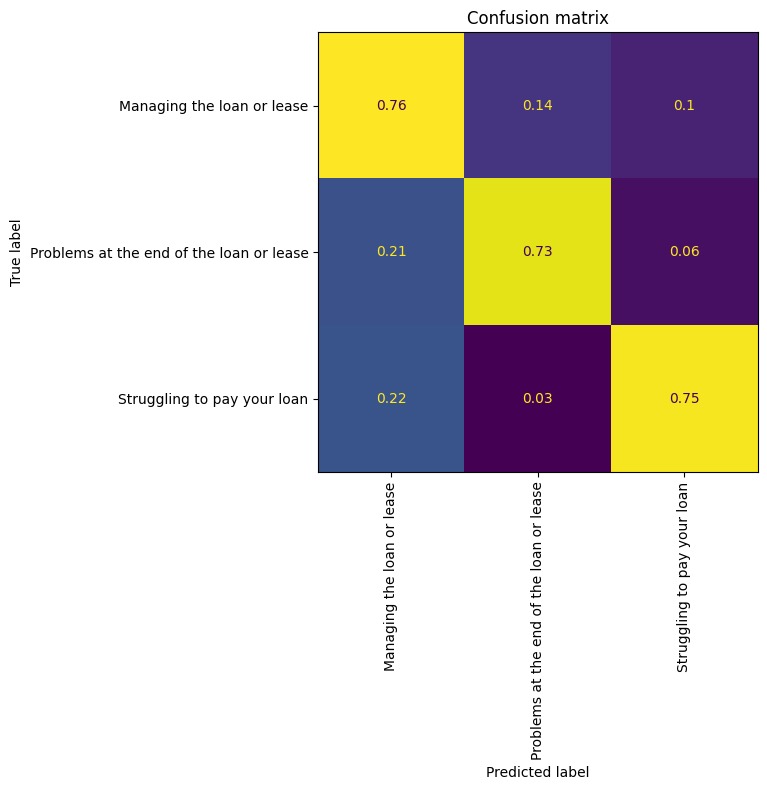

In [33]:
plot_confusion_matrix(y_preds,y_valid,labels)